# Writeup of the Project: Build a Traffic Sign Recognition Classifier


The goals / steps of this project are the following:
* Load the data set (see below for links to the project data set)
* Explore, summarize and visualize the data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Summarize the results with a written report

--------

## Rubric Points
### Here I will consider the rubric points individually and describe how I addressed each point in my implementation.  

---
## 1. Dataset Exploration
### 1-1. Dataset summary

Afer loading the pickled data for training, validation and testing,I used the numpy library to calculate summary statistics of the traffic signs data set:


The size of training set is 34799.  
The size of the validation set is 4410.  
The size of test set is 12630.  
The shape of a traffic sign image is RGB color image of 32 pixels by 32 pixels.   
The number of unique classes/labels in the data set is 43.

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../data/train.p"
validation_file= "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
X_valid shape: (4410, 32, 32, 3)
y_valid shape: (4410,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =",n_train)
print("Number of validation examples=",n_validation)
print("Number of testing examples =",n_test)
print("Image data shape =",image_shape)
print("Number of classes =",n_classes)

Number of training examples = 34799
Number of validation examples= 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### 1-2. Exploratory visualization

Here I randomly picked up some images and visualized them with each label by using random library.

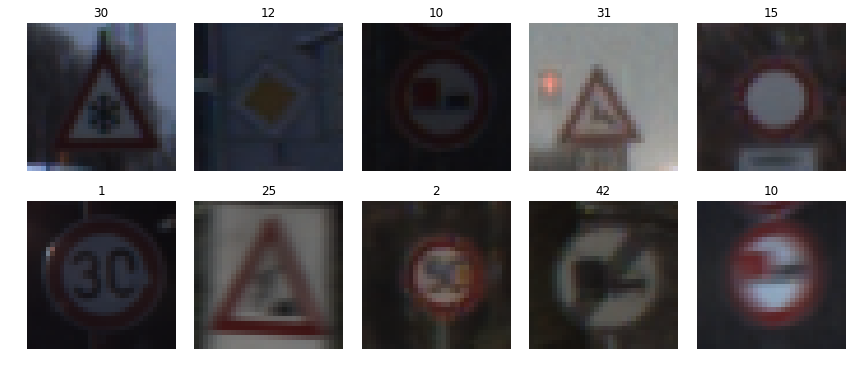

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random

# showing 10 random image data
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = random.randint(0,X_train.shape[0])
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

----

## 2. Design and Test a Model Architecture

### 2-1. Preprocessing

As a first step, I decided to convert the images to grayscale by averaging values of RGB channel, in order to reduce the computational load.  
Then, I normalized the train, validation and test datasets by (pixel - 128)/ 128 so that the data has mean zero and equal variance.   
As a final step, I decided to shuffle the examples using shuffle from the sklearn.utils library to secure randomized(non-fixed) initial state.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.


# Store original data
X_train_org = X_train
X_valid_org = X_valid
X_test_org = X_test

# Convert to grayscale by averaging values of RGB channel
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3,  axis=3, keepdims=True)


print('Train data RGB shape:', X_train.shape)
print('Train data Grayscale shape:', X_train_gray.shape)
print('Valid data RGB shape:', X_valid.shape)
print('Valid data Grayscale shape:', X_valid_gray.shape)
print('Test data RGB shape:', X_test.shape)
print('Test data Grayscale shape:', X_test_gray.shape)

Train data RGB shape: (34799, 32, 32, 3)
Train data Grayscale shape: (34799, 32, 32, 1)
Valid data RGB shape: (4410, 32, 32, 3)
Valid data Grayscale shape: (4410, 32, 32, 1)
Test data RGB shape: (12630, 32, 32, 3)
Test data Grayscale shape: (12630, 32, 32, 1)


In [5]:
## Normalize the train, validation and test datasets by (pixel - 128)/ 128

X_train = (X_train_gray - 128)/128
X_valid = (X_valid_gray - 128)/128
X_test  = (X_test_gray  - 128)/128

print('Average of normalized Train data:',np.mean(X_train))
print('Average of normalized Validation data:',np.mean(X_valid))
print('Average of normalized Test data:',np.mean(X_test))

Average of normalized Train data: -0.354081335648
Average of normalized Validation data: -0.347215411128
Average of normalized Test data: -0.358215153428


In [6]:
# Shuffle training data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

### 2-2.Model Architecture

My final model consists of the following layers.

|Layer|Explanation|
| -- | ------------------------------------------------- |
|Input|32x32x1 Grayscale image|
|Convolution|1x1 stride, VALID padding, output = 28x28x6 |
| RELU |  |
| Max pooling|2x2 stride, VALID padding, output = 14x14x6 |
| Convolution|1x1 stride, VALID padding, output = 10x10x16 |
| RELU |  |
| Max pooling| 2x2 stride, VALID padding, output = 5x5x16 |
| Flatten| output = 400  |
| Dropout  | 50% dropped |
| Fully connected| output = 120  |
| RELU  |   |
| Dropout  | 50% dropped  |
| Fully connected| output = 84  |
| RELU  |   |
| Dropout  | 50% dropped  |
| Fully connected| output = 43  |





In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 200
BATCH_SIZE = 128
DROPOUT = 0.5

In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

In [9]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400. 
    fc0   = flatten(conv2)
    #addding dropout
    fc0   = tf.nn.dropout(fc0, keep_prob)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation. 
    fc1    = tf.nn.relu(fc1)
    #addding dropout
    fc1    = tf.nn.dropout(fc1, keep_prob) 

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    #addding dropout
    fc2    = tf.nn.dropout(fc2, keep_prob) 
    
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### 2-3 Model Training

Basically, I used the provided LeNet function for training the model, except for adding "Dropout" function.

I understood that low accuracy on the training and validation sets imply underfitting,
while too high accuracy on the training set but low accuracy on the validation set implies overfitting.
In order to avoid overfitting, I added dropout function.

### 2-4. Solution Approach

During test and error process, I noticed that more epochs would basically leads to high accuracy although the computing time becomes longer.
So I firstly set sufficient number to "EPOCHS".

Then, I tweaked learning rate, batch size and dropout for several trials, then concluded to use following sets.  
EPOCHS is 200  
BATCH_SIZE is 128  
DROPOUT 50%  
Learning rate is 0.06 %  

#### **Result**  
Training Accuracy = 99.687%  
Validation Accuracy = 96.961%  
Test Accuracy = 95.305%  

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.0006

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: DROPOUT})
        training_accuracy = evaluate(X_train, y_train)            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}%".format(100*training_accuracy))
        print("Validation Accuracy = {:.3f}%".format(100*validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 26.279%
Validation Accuracy = 20.340%

EPOCH 2 ...
Training Accuracy = 53.168%
Validation Accuracy = 48.798%

EPOCH 3 ...
Training Accuracy = 66.421%
Validation Accuracy = 60.862%

EPOCH 4 ...
Training Accuracy = 76.712%
Validation Accuracy = 70.249%

EPOCH 5 ...
Training Accuracy = 83.094%
Validation Accuracy = 77.574%

EPOCH 6 ...
Training Accuracy = 86.158%
Validation Accuracy = 80.907%

EPOCH 7 ...
Training Accuracy = 87.663%
Validation Accuracy = 81.995%

EPOCH 8 ...
Training Accuracy = 88.730%
Validation Accuracy = 84.082%

EPOCH 9 ...
Training Accuracy = 90.158%
Validation Accuracy = 85.873%

EPOCH 10 ...
Training Accuracy = 91.715%
Validation Accuracy = 87.234%

EPOCH 11 ...
Training Accuracy = 92.451%
Validation Accuracy = 88.118%

EPOCH 12 ...
Training Accuracy = 92.862%
Validation Accuracy = 87.823%

EPOCH 13 ...
Training Accuracy = 93.123%
Validation Accuracy = 89.297%

EPOCH 14 ...
Training Accuracy = 93.445%
Validation Accuracy

EPOCH 115 ...
Training Accuracy = 99.511%
Validation Accuracy = 96.576%

EPOCH 116 ...
Training Accuracy = 99.503%
Validation Accuracy = 96.712%

EPOCH 117 ...
Training Accuracy = 99.500%
Validation Accuracy = 96.712%

EPOCH 118 ...
Training Accuracy = 99.497%
Validation Accuracy = 96.531%

EPOCH 119 ...
Training Accuracy = 99.486%
Validation Accuracy = 96.803%

EPOCH 120 ...
Training Accuracy = 99.408%
Validation Accuracy = 96.984%

EPOCH 121 ...
Training Accuracy = 99.555%
Validation Accuracy = 96.735%

EPOCH 122 ...
Training Accuracy = 99.546%
Validation Accuracy = 96.689%

EPOCH 123 ...
Training Accuracy = 99.514%
Validation Accuracy = 96.463%

EPOCH 124 ...
Training Accuracy = 99.509%
Validation Accuracy = 96.553%

EPOCH 125 ...
Training Accuracy = 99.454%
Validation Accuracy = 96.780%

EPOCH 126 ...
Training Accuracy = 99.534%
Validation Accuracy = 96.531%

EPOCH 127 ...
Training Accuracy = 99.537%
Validation Accuracy = 96.939%

EPOCH 128 ...
Training Accuracy = 99.560%
Validatio

In [13]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}%".format(100*test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 95.305%


---
## 3: Test a Model on New Images

### 3-1. Acquiring New Images

I picked up some PNG format images from web.  
These are not specially difficult for the model to classify,   
but I assumed that original data format difference might be difficult for the model.

After loading the png file, I converted color channel from BGR to RGB and resize them to 32x32.

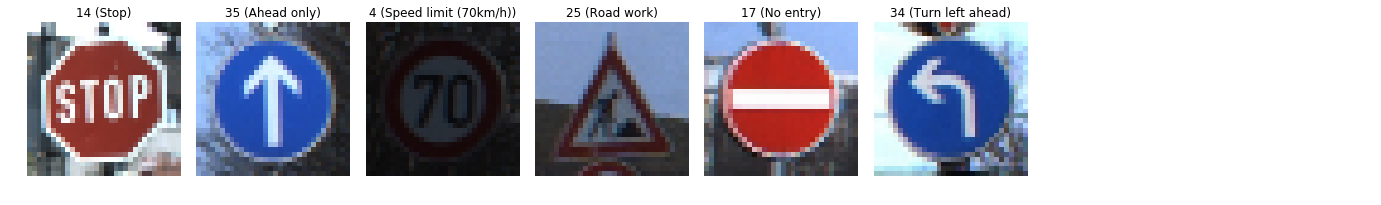

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob

original_data_folder = 'original_pics_from_web/'
    
org_X_test = []
org_Y_test = []
for image_file in glob.glob(original_data_folder + "*.png"):
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (32, 32))
    try:
        # the label is encoded into the first two characters of the file names
        label_str = image_file[len(original_data_folder):][:2]
        label = int(label_str)
        org_X_test.append(image)
        org_Y_test.append(label)
    except  Exception:
        print ('Ignoring image {}'.format(image_file))

#-------------------------------------
# read the semantics of the numbers
import csv
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

classId2SignName = {}

with open('signnames.csv') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        classId2SignName[row[0]] = row[1]


def imagevisualizer(images,labels):
    n_columns = 8
    n_rows = int(len(images)/n_columns)+1
    width = 24
    height = n_rows * 3
    fig, axs = plt.subplots(n_rows,n_columns, figsize=(width, height))
    fig.subplots_adjust(hspace = .2, wspace=.1)
    axs = axs.ravel()
    for i in range(n_columns * n_rows):
        axs[i].axis('off')
        if (i<len(images)):
            image = images[i]
            axs[i].axis('off')
            axs[i].imshow(image)
            axs[i].set_title('{} ({:.20})'.format(labels[i], classId2SignName[str(labels[i])]))
 

imagevisualizer(org_X_test, org_Y_test)


### 3-2. Performance on New Images

Contrary to my assumption, the model perfectly classify the captured PNG images.  
Compared to the test accuracy(95.305%), performance on new images(100%) are much better.

INFO:tensorflow:Restoring parameters from ./lenet
[14 35  4 25 17 34]
[14, 35, 4, 25, 17, 34]


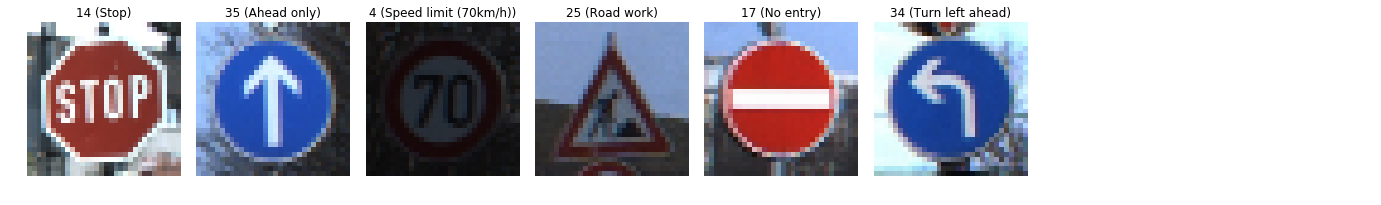

In [15]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

norm_org_X_test = np.array(org_X_test)
norm_org_X_test = np.sum(norm_org_X_test/3, axis=3, keepdims=True)
norm_org_X_test = (norm_org_X_test - 128)/128

prediction=tf.argmax(logits,1)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = sess.run(prediction, feed_dict={x: norm_org_X_test, keep_prob: 1.0})
    imagevisualizer(org_X_test, predictions)
    print(predictions)
    print(org_Y_test)

In [16]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    original_test_accuracy = evaluate(norm_org_X_test, org_Y_test)
    print("Original Test Accuracy = {:.3f}%".format(100*original_test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Original Test Accuracy = 100.000%


### 3-3. Model  Certainty - Softmax Probabilities

Out of 6 cropped images from web, 5 images are 100% correctly classified.
Only one image, which is "Speed limit (70km/h)", its softmax probability is not 100%, since other similar speed list sign had got small probabilities.  

Through this result, I became confident that this model works correclty, seeing no misclassification on different type of sign, but left some small probability to similar traffic sign. (still number reccognition is correctly done.)


In [30]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
softmax_logits = tf.nn.softmax(logits)
top_k=tf.nn.top_k(softmax_logits,5)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top_k = sess.run(top_k, feed_dict={x: norm_org_X_test, keep_prob : 1.0})
    
#   Calculate Top_5 softmax probabilities
    probabilities = top_k.values
    indices = top_k.indices

    for i in range(len(indices)):
        for j in range(len(indices[i])):
            index = indices[i][j]
            probability = probabilities[i][j]
            print('{:.8f}% ({} {:.20})'.format(probability*100, index,  classId2SignName[str(index)]))
        print('')


INFO:tensorflow:Restoring parameters from ./lenet
100.00000000% (14 Stop)
0.00000000% (34 Turn left ahead)
0.00000000% (33 Turn right ahead)
0.00000000% (3 Speed limit (60km/h))
0.00000000% (1 Speed limit (30km/h))

100.00000000% (35 Ahead only)
0.00000000% (3 Speed limit (60km/h))
0.00000000% (36 Go straight or right)
0.00000000% (34 Turn left ahead)
0.00000000% (14 Stop)

99.92576241% (4 Speed limit (70km/h))
0.06195148% (1 Speed limit (30km/h))
0.01176295% (0 Speed limit (20km/h))
0.00030980% (8 Speed limit (120km/h)
0.00020449% (5 Speed limit (80km/h))

100.00000000% (25 Road work)
0.00000000% (29 Bicycles crossing)
0.00000000% (22 Bumpy road)
0.00000000% (20 Dangerous curve to t)
0.00000000% (38 Keep right)

100.00000000% (17 No entry)
0.00000000% (14 Stop)
0.00000000% (38 Keep right)
0.00000000% (34 Turn left ahead)
0.00000000% (0 Speed limit (20km/h))

100.00000000% (34 Turn left ahead)
0.00000007% (38 Keep right)
0.00000000% (36 Go straight or right)
0.00000000% (32 End of all 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")